# Mid Term Project
by:
Srini and Denny

<a id='content'></a>
### Table of content
<a href='#setup'>setup libraries</a>
- pandas, numpy
- sklearn

<a href='#helper_function'>helper functions</a>
- plot data

<a href='#data_functions'>data functions</a>
- interquartile
- droping tables
- transformation

<a href='#raw_data'>raw data</a>
- loading raw data
<li>
    <a href='#plot_raw'>plot raw data</a>
    <li>
    <a href='#heatmap'>heatmap</a>
    </li>
</li>

<a href='#analyze_raw_data'>analyze Raw Data</a>

<a href='#plot_regression'>plot regression graph</a>

<a href='#feature_importance'>feature importance</a>

<a href='#content'>back to content list</a>
<a id='setup'></a> 
### Setup

In [898]:
# import libraries

# dealing with data libs
import pandas as pd
import numpy as np


# dealing with date 
import datetime

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm # progressbar for looping


# machine learning libs
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm





<a href='#content'>back to content list</a>
<a id='helper_function'></a> 
### Helper Functions

In [899]:
# ploting all numerical data from dataframe

def plot_numeric(data):
    for i in data._get_numeric_data():
        fig , ax = plt.subplots(1,2, figsize=(15,7))
        plt.title(i)
        sns.boxplot(x=data[i], ax=ax[0])
        sns.histplot(data[i], ax=ax[1])

        plt.show()

<a id='data_functions'></a>
<a href='#content'>back to content list</a>
### Functions for optional data handling:

#### option 1 Interquartile

In [900]:
# rip data in interquartile range

def reduce_to_interquartile(data: pd.DataFrame, name: list) -> pd.DataFrame:
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    filter = (data[name] >= Q1 - 1.5 * IQR) & (data[name] <= Q3 + 1.5 *IQR)
    data=data.loc[filter] 

    return data

#### option 2 remove

In [901]:
# remove column

def remove_column(data: pd.DataFrame, name: list) -> pd.DataFrame:
    data = data.drop(columns=name, inplace= True)

    return data

#### perform transformation operation on data

In [902]:
# transform operation

def aggregate_powertransform(data: pd.DataFrame, name: str, lamda_value: float = 0)-> pd.DataFrame:
    pwr_trans = PowerTransformer(method='box-cox')
    if lamda_value != 0:
        pwr_trans.lambdas_ = lamda_value
    data[name] = pwr_trans.fit_transform(data[name].to_numpy().reshape(-1,1))
    #pwr_trans.fit(data[name].array.reshape(-1,1))
    #pwr_trans.transform(data[name].array.reshape(-1,1))
    return data


<a id='raw_data'></a>
<a href='#content'>back to content list</a>
### load raw data

In [903]:
# load data and create work_copy

raw_data = pd.read_excel('../data/Data_MidTerm_Project_Real_State_Regression.xls')

work_copy = raw_data.copy()


### Data review

In [904]:
raw_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


<a id='plot_raw'></a>
<a href='#content'>back to content list</a>
### Plotting raw data

In [905]:
# analyze raw data
#plot_numeric(work_copy)

<a id='heatmap'></a>
<a href='#content'>back to content list</a>

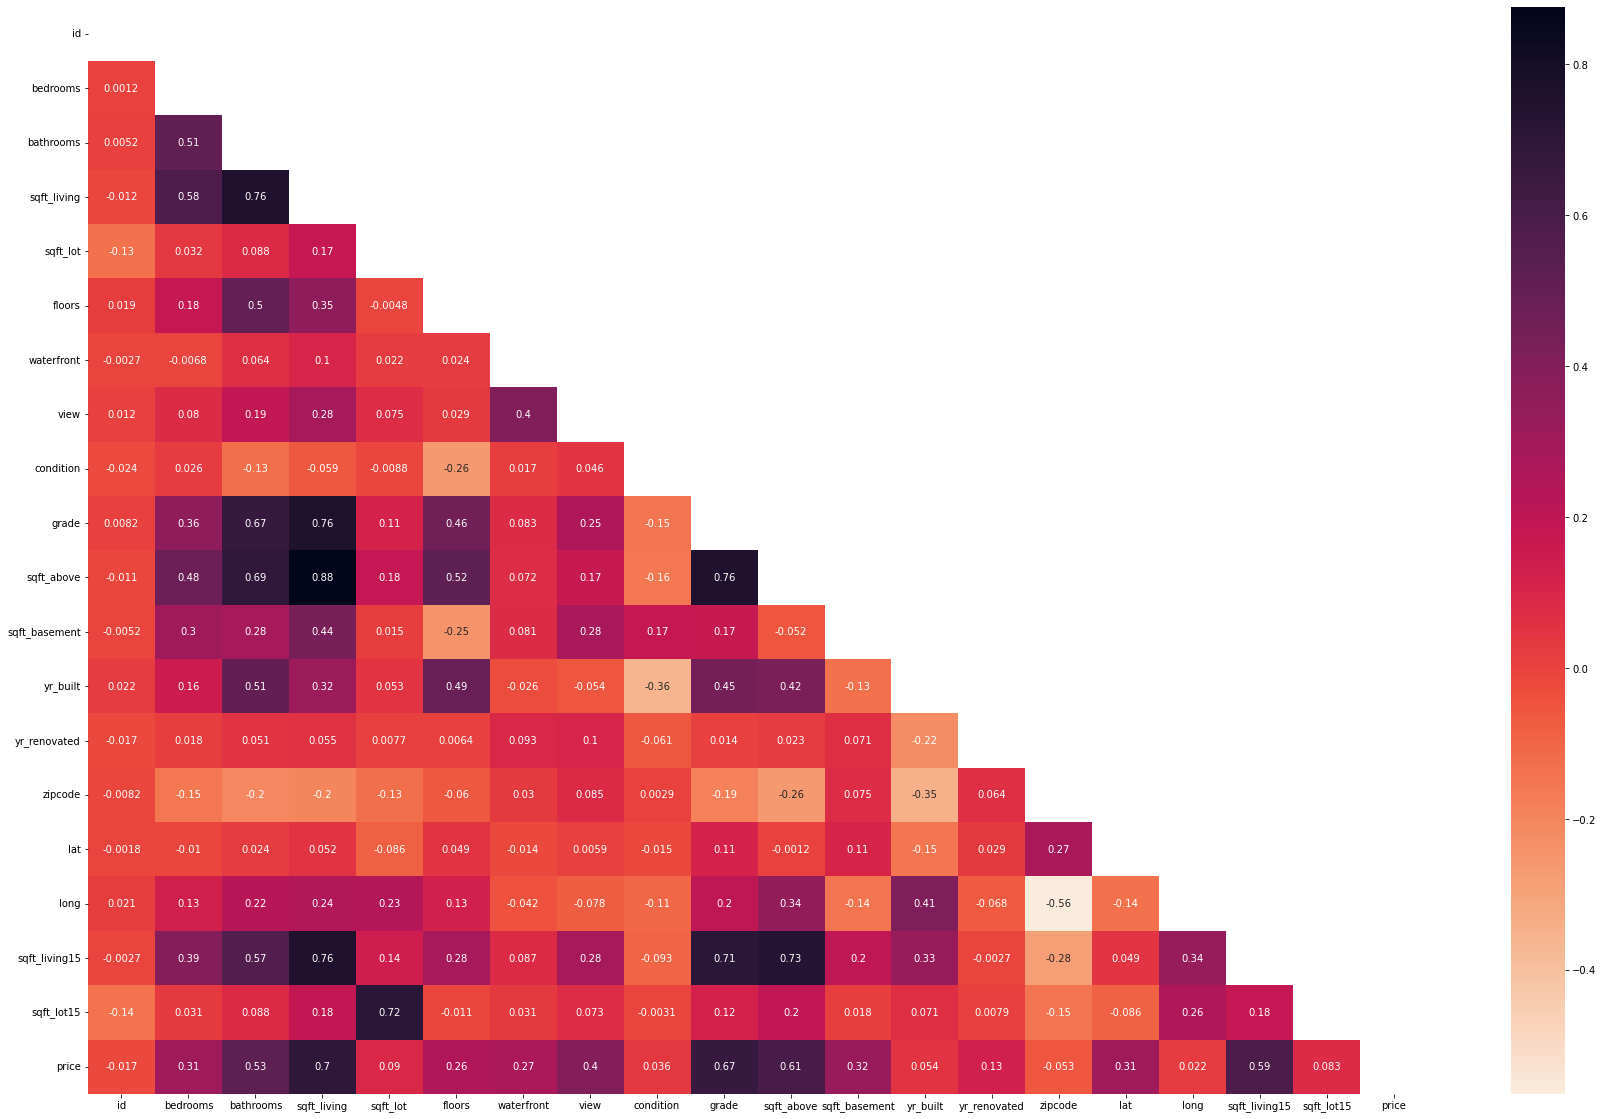

In [906]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(work_copy._get_numeric_data().corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(30, 20))
ax=sns.heatmap(work_copy._get_numeric_data().corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

<a id='analyze_raw_data'></a>
<a href='#content'>back to content list</a>
### **Data description:** 

> id -> will be removed as not mandatory
>
> bedrooms -> need adjustments as max 33 could be an outlayer, without -> normal distributed
>
> bathrooms -> max 8 needs to check, if its fits with connected sqft range ->
>
> sqft_living -> maybe recalculated in square meter to fit better in european perspective
>
> sqft_lot -> similar to sqft_living
>
> floors -> maybe changable to ordonal categorical
>
> waterfront -> set to categorical 
>
> view -> needs review why min to 75% is zero with an max of 4
>
> condition -> transform to ordonal categorical 0-5
>
> grade -> as descripted typical ordonal categorical 0-13
>
> sqft_above -> similar to sqft_living
>
> sqft_basement -> similar to sqft_living
> - as sqft_basement looks without zero numbers as normal distributed
> - ***ToDo:*** drop zero values from this column
> - create category 'has_basement'
> - fill all 'has_basement' where basement is included
>
> yr_build -> use as number or could be ordonal category when binning with steps e.g 5 years 1900-1905 ....
>
> zip code, lat and long -> skipt or could binning or clustered to regions 
>
> sqft_living15 and sqft_lot15 represents the average living and lot sqft of the closest 15 neiboorhouses





In [907]:
# drop first not need data
work_copy.drop(columns=['id', 'date', 'sqft_lot','sqft_above','zipcode', 'view', 'floors', 'yr_renovated','sqft_living15', 'sqft_lot15'], inplace=True)

In [908]:
# interquartile sqft_living

#work_copy =  work_copy[work_copy['bedrooms'] != 33]

work_copy = reduce_to_interquartile(data=work_copy, name='price')

#work_copy = reduce_to_interquartile(data=work_copy, name='bedrooms')
#work_copy = reduce_to_interquartile(data=work_copy, name='sqft_living')
#work_copy = reduce_to_interquartile(data=work_copy, name='bathrooms')


#work_copy = aggregate_powertransform(data= work_copy, name= 'sqft_living',lamda_value=0.02)
#work_copy = aggregate_powertransform(data= work_copy, name= 'sqft_lot')
#work_copy = aggregate_powertransform(data= work_copy, name='bathrooms')
#work_copy = aggregate_powertransform(data= work_copy, name='bedrooms')
#work_copy = aggregate_powertransform(data= work_copy, name= 'yr_built')

In [909]:
# basement has no real influence so i transform this to an binary has or has not field 0 or 1
work_copy['sqft_basement'].values[work_copy['sqft_basement'] != 0] = 1


In [910]:
work_copy.dropna(inplace=True)

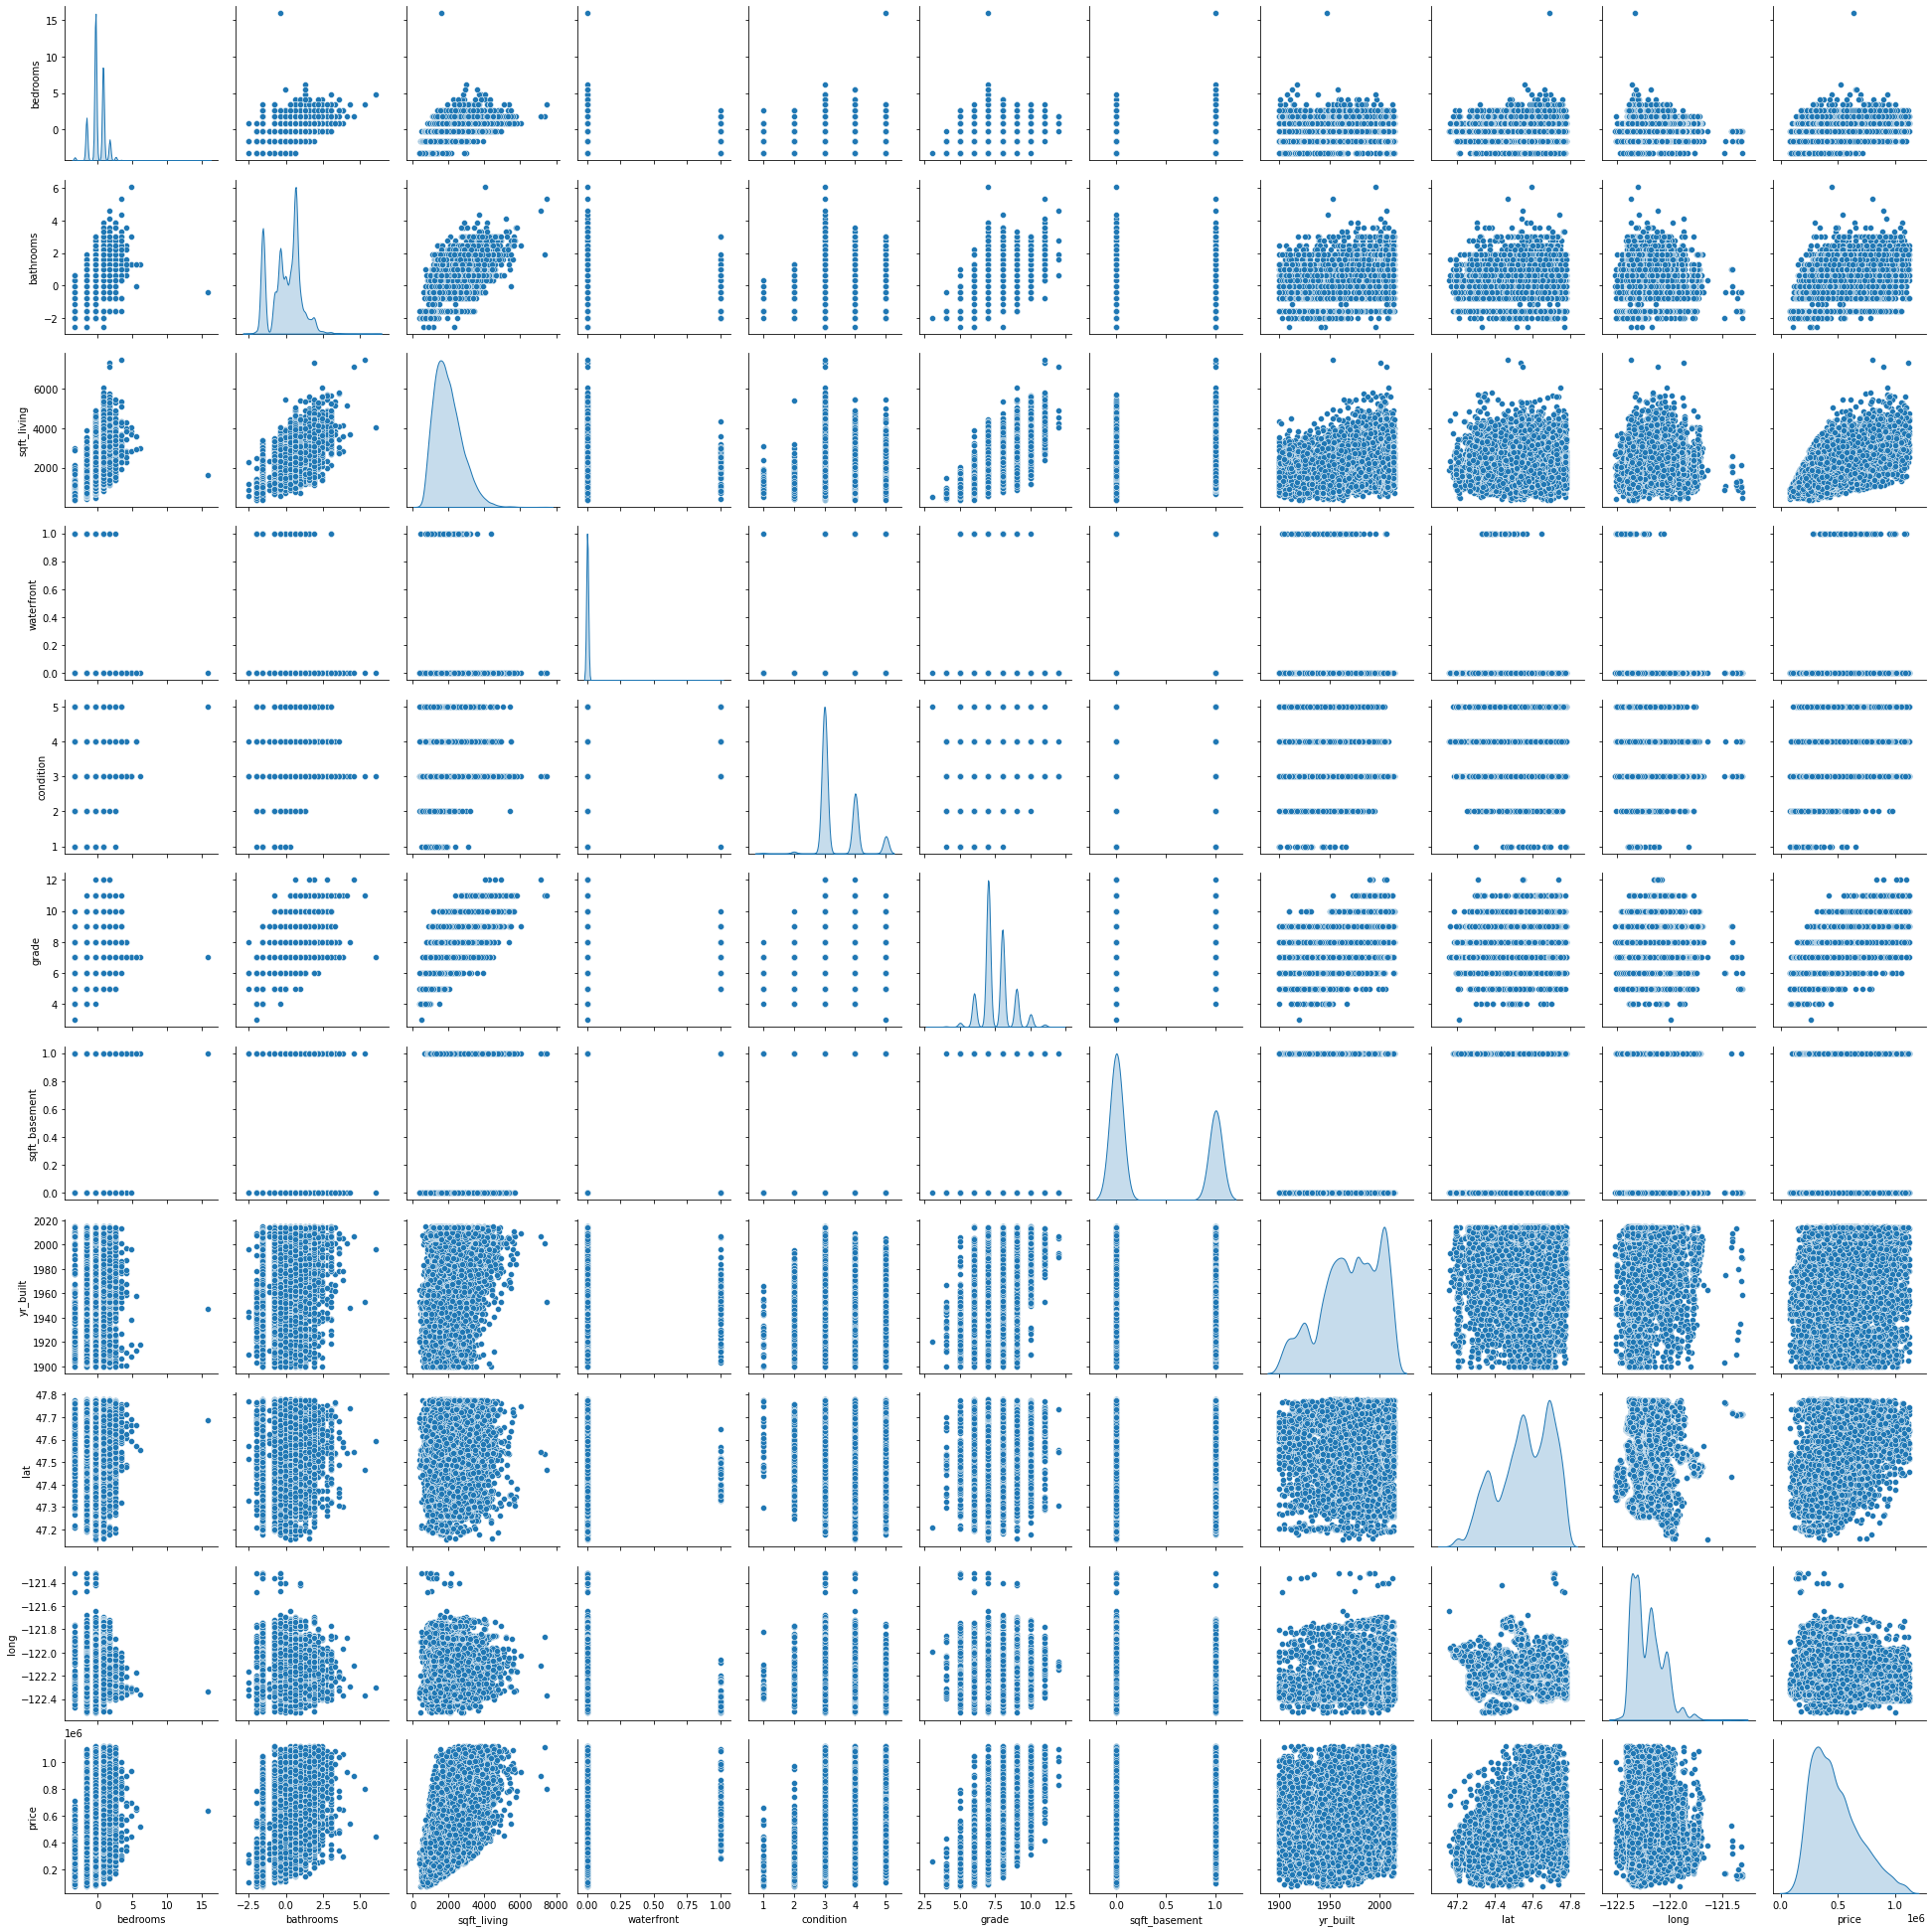

In [911]:
#plot_numeric(work_copy)
sns.pairplot(work_copy,diag_kind="kde")

In [912]:
work_copy.describe()

,bedrooms,bathrooms,sqft_living,waterfront,condition,grade,sqft_basement,yr_built,lat,long,price
count,2.043900e+04,2.043900e+04,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,2.043900e+04
mean,-1.670946e-15,7.471058e-15,1975.189931,0.002984,3.406625,7.530652,0.379422,1970.805079,47.556892,-122.213337,4.767026e+05
std,1.000024e+00,1.000024e+00,773.797924,0.054550,0.647000,1.036060,0.485255,29.159010,0.141049,0.142326,2.077903e+05
min,-3.295079e+00,-2.505089e+00,370.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,47.155900,-122.519000,7.800000e+04
25%,-3.105838e-01,-7.484092e-01,1400.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,47.460400,-122.330000,3.150000e+05
50%,-3.105838e-01,-1.834270e-02,1860.000000,0.000000,3.000000,7.000000,0.000000,1974.000000,47.566900,-122.232000,4.375000e+05
75%,7.796026e-01,6.582180e-01,2430.000000,0.000000,4.000000,8.000000,1.000000,1996.000000,47.679800,-122.123000,6.000000e+05
max,1.594914e+01,6.071371e+00,7480.000000,1.000000,5.000000,12.000000,1.000000,2015.000000,47.777600,-121.315000,1.120000e+06


### First Approach with unfilterd data

In [913]:
label = work_copy['price']
work_copy.drop(columns='price', inplace=True)

In [914]:
x_train, x_test, y_train, y_test = train_test_split(work_copy, label, test_size= 0.2, random_state= 42)

In [915]:
x_train.describe()

,bedrooms,bathrooms,sqft_living,waterfront,condition,grade,sqft_basement,yr_built,lat,long
count,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000
mean,-0.001431,-0.002440,1974.060791,0.002813,3.408538,7.529631,0.378754,1970.744847,47.556842,-122.212870
std,1.000852,0.999571,775.459602,0.052967,0.647884,1.041740,0.485091,29.219427,0.140921,0.142931
min,-3.295079,-2.505089,370.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,47.155900,-122.519000
25%,-0.310584,-0.748409,1400.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,47.461000,-122.330000
50%,-0.310584,-0.018343,1850.000000,0.000000,3.000000,7.000000,0.000000,1974.000000,47.566600,-122.232000
75%,0.779603,0.658218,2431.000000,0.000000,4.000000,8.000000,1.000000,1996.000000,47.679500,-122.122000
max,15.949145,6.071371,7480.000000,1.000000,5.000000,12.000000,1.000000,2015.000000,47.777600,-121.315000


In [916]:
scaler_train = StandardScaler().fit(x_train)
#scaler_train = RobustScaler().fit(x_train)
#scaler_train = MinMaxScaler().fit(x_train)

scaler_train.transform(x_train)
scaler_train.transform(x_test)


array([[-0.30889955, -0.37323659, -0.72741125, ...,  1.48040124,
        -0.28202232, -0.93845366],
       [-0.30889955, -0.74631258, -0.68872334, ...,  0.21408168,
        -0.10674111, -0.43469733],
       [ 0.78039259,  0.66096118,  0.14951489, ...,  1.20660241,
         1.33737733,  0.14602178],
       ...,
       [-0.30889955, -1.55555021, -1.24325016, ...,  0.14563197,
        -2.03625366, -0.29476501],
       [-0.30889955, -0.74631258,  0.72983365, ..., -0.40196568,
         0.89810985, -0.65159242],
       [ 0.78039259, -0.0159105 ,  0.07213905, ..., -0.05971715,
        -2.78279548,  1.67828063]])

In [917]:
model_l = LinearRegression()

model_l.fit(x_train, y_train)

LinearRegression()

In [918]:
y_pred = model_l.predict(x_test)
y_pred_train = model_l.predict(x_train)

In [919]:
x_train_sm = sm.add_constant(x_train) # adding a constant
model = sm.OLS(list(y_train), x_train_sm).fit()

model.summary()


/opt/anaconda3/envs/DA_Enviroment/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     3321.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:38:42   Log-Likelihood:            -2.1440e+05
No. Observations:               16351   AIC:                         4.288e+05
Df Residuals:                   16340   BIC:                         4.289e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.033e+07   1.01e+06    -20.183      0.000   -2.23e+07   -1.84e+07
bedrooms      -1.228e+04   1204.404    -10.197      0.000   -1.46e+04   -9920.215
bathrooms      2.179e+04   1562.521     13.947      0.000    1.87e+04    2.49e+04
sqft_living      98.1129      2.279     43.059      0.000      93.647     102.579
waterfront     2.292e+05   1.78e+04     12.883      0.000    1.94e+05    2.64e+05
condition       2.35e+04   1568.709     14.980      0.000    2.04e+04    2.66e+04
grade           8.71e+04   1433.361     60.763      0.000    8.43e+04    8.99e+04
sqft_basement -2671.0134   2136.592     -1.250      0.211   -6858.966    1516.939
yr_built      -1773.8937     47.002    -37.741      0.000   -1866.023   -1681.764
lat            5.203e+05   6959.029     74.766      0.000    5.07e+05    5.34e+05
long           1.122e+04   7587.989      1.479      0.139   -3648.839    2.61e+04
==============================================================================
Omnibus:                     1598.887   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3016.391
Skew:                           0.662   Prob(JB):                         0.00
Kurtosis:                       4.636   Cond. No.                     3.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='plot_regression'></a>
<a href='#content'>back to content list</a>
### Plot Regression Graph

In [920]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

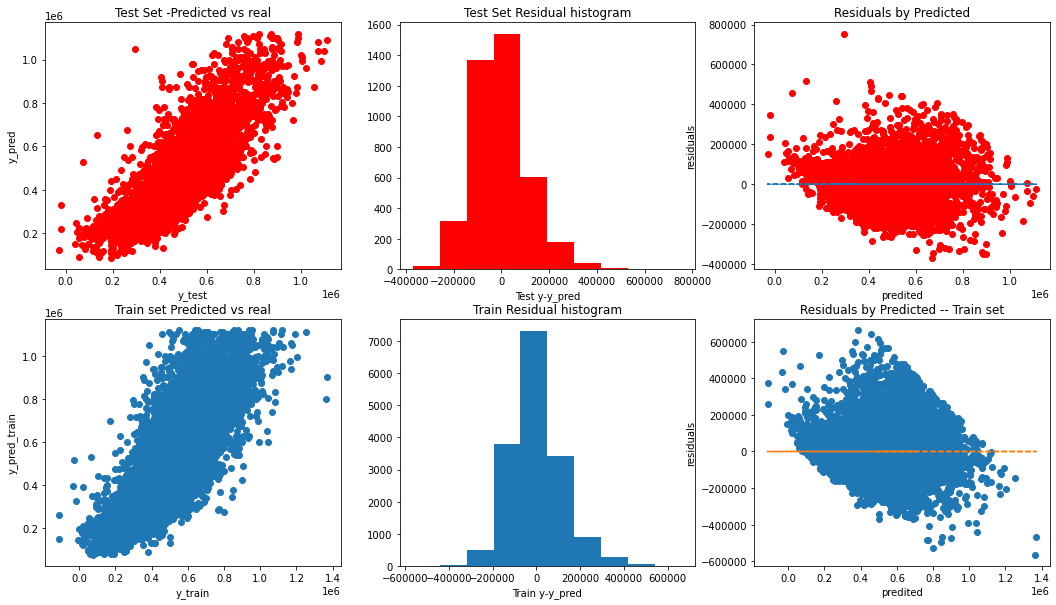

In [921]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,3,figsize=(18,10))
ax[0,0].plot(y_pred, y_test, 'o',color='red')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred, color='red')
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[0,2].plot(y_pred,y_test - y_pred,"o", color='red')
ax[0,2].set_xlabel("predited")
ax[0,2].set_ylabel("residuals")
ax[0,2].set_title("Residuals by Predicted")
ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')



ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
ax[1,2].set_xlabel("predited")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

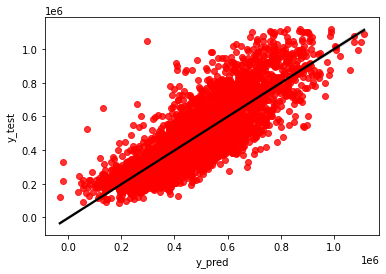

In [922]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

<a id='feature_importance'></a>
<a href='#content'>back to content list</a>

In [923]:
model_l.coef_

array([-1.22809778e+04,  2.17931794e+04,  9.81129280e+01,  2.29154808e+05,
        2.34992729e+04,  8.70956200e+04, -2.67101339e+03, -1.77389367e+03,
        5.20299397e+05,  1.12244471e+04])

In [924]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model_l.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

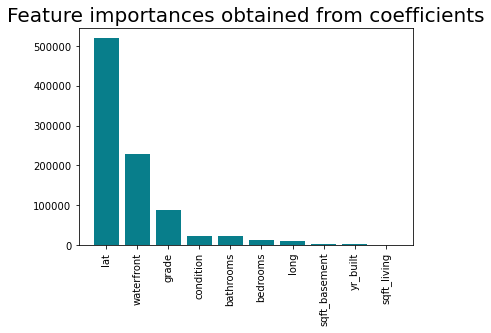

In [925]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [926]:
R2_train=r2_score(y_train,y_pred_train)
R2_test=r2_score(y_test,y_pred)
print (R2_train)
print(R2_test)

0.6702545211486819
0.687724216894384
